In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import tqdm
import pandas as pd 

In [2]:
# class k_arms_bandit:
#     def __init__(self, n_arms):
#         self.n_arms = n_arms
#         self.action_values = np.random.randn(self.n_arms)
    
#     def draw(self, chosen_arm):
#         reward = np.random.normal(self.action_values[chosen_arm], 1.0) 
#         return reward 
        
#     def reset(self):
#         self.action_values = np.random.randn(self.n_arms) #スロットを再設定
    
#     def render(self):
#         plt.figure()
#         plt.plot(self.action_values, 'o')

In [3]:
# class non_stationary_k_arms_bandit(k_arms_bandit):
#     def draw(self, chosen_arm):
#         self.action_values += np.random.normal(0, 0.01, self.n_arms)
#         reward = np.random.normal(self.action_values[chosen_arm], 1.0) 
#         return reward 

In [4]:
# class EpsilonGreedy():
    
#     def __init__(self, epsilon, counts, values):
#         self.epsilon = epsilon
#         self.counts = counts
#         self.values = values 
        
#     def initialize(self, n_arms):
#         self.counts = np.zeros(n_arms)
#         self.values = np.zeros(n_arms)
        
#     def select_arm(self):
#         if random.random() > epsilon :
#             return np.argmax(self.values)
#         else:
# #           return random.randint(0, len(self.values)-1)
        
#     def update(self, chosen_arm, reward):
#         self.counts[chosen_arm] = self.counts[chosen_arm] + 1
#         n = self.counts[chosen_arm]
#         value = self.values[chosen_arm]
#         new_value = (n-1)/float(n) * value + (1/float(n)) * reward
#         self.values[chosen_arm] = new_value
            

In [5]:
# def test_algorithm(algo, n_arms, num_sims, horizon):
#     chosen_arms = np.zeros(num_sims * horizon)
#     #cumulative_rewards = np.zeros(num_sims * horizon)
#     times = np.zeros(num_sims * horizon)
#     for sim in (range(num_sims)):
#         algo.initialize(n_arms)
#         for t in range(horizon):
#             index = sim * horizon + t
#             times[index] = t + 1
#             chosen_arm = algo.select_arm()
#             chosen_arms[index] = chosen_arm
#             reward = arms.draw(chosen_arm)
#             algo.update(chosen_arm, reward)
#     return [times, chosen_arms]

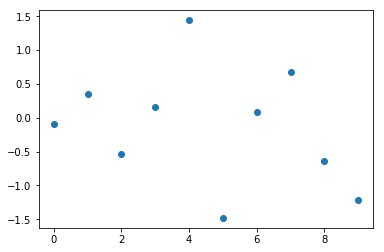

In [6]:
algo = EpsilonGreedy(0.1, [], [])
arms = k_arms_bandit(10)
arms.render()

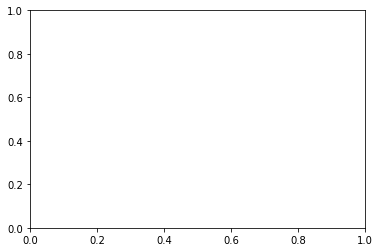

In [7]:
n_arms = 10
fig = plt.figure()
ax = fig.add_subplot(111)
random.seed(42)
horizon = 10000
n_sim = 100
epsilon = 0.1

In [12]:
result = test_algorithm(algo, 10, n_sim, horizon)
df_result = pd.DataFrame({"times": result[0], "chosen_arms": result[1]})
df_result["best_arms"] = df_result["chosen_arms"] == 4 
grouped = df_result["best_arms"].groupby(df_result["times"])

In [13]:
df_result['chosen_arms']

0         0.0
1         1.0
2         2.0
3         3.0
4         3.0
5         4.0
6         4.0
7         4.0
8         4.0
9         4.0
10        4.0
11        4.0
12        4.0
13        4.0
14        4.0
15        4.0
16        4.0
17        4.0
18        4.0
19        4.0
20        4.0
21        4.0
22        4.0
23        4.0
24        4.0
25        4.0
26        4.0
27        4.0
28        4.0
29        4.0
         ... 
999970    4.0
999971    4.0
999972    4.0
999973    4.0
999974    4.0
999975    4.0
999976    4.0
999977    4.0
999978    5.0
999979    4.0
999980    4.0
999981    4.0
999982    4.0
999983    4.0
999984    4.0
999985    4.0
999986    4.0
999987    4.0
999988    4.0
999989    4.0
999990    4.0
999991    4.0
999992    4.0
999993    4.0
999994    4.0
999995    4.0
999996    4.0
999997    4.0
999998    4.0
999999    4.0
Name: chosen_arms, Length: 1000000, dtype: float64

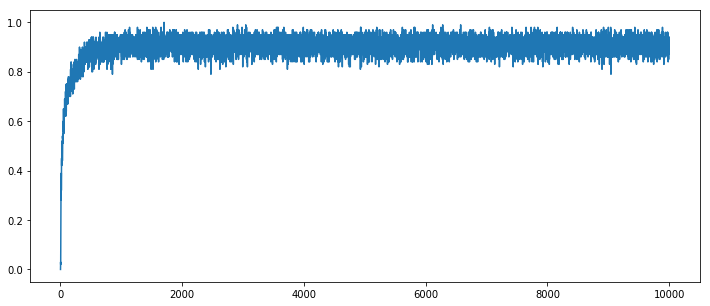

In [25]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.plot(grouped.mean())
plt.show()

In [26]:
grouped.mean()

times
1.0        0.00
2.0        0.01
3.0        0.03
4.0        0.02
5.0        0.12
6.0        0.17
7.0        0.18
8.0        0.26
9.0        0.32
10.0       0.28
11.0       0.33
12.0       0.35
13.0       0.34
14.0       0.39
15.0       0.32
16.0       0.40
17.0       0.40
18.0       0.44
19.0       0.45
20.0       0.42
21.0       0.46
22.0       0.47
23.0       0.46
24.0       0.44
25.0       0.47
26.0       0.51
27.0       0.52
28.0       0.44
29.0       0.46
30.0       0.47
           ... 
9971.0     0.89
9972.0     0.88
9973.0     0.90
9974.0     0.95
9975.0     0.96
9976.0     0.90
9977.0     0.95
9978.0     0.89
9979.0     0.85
9980.0     0.92
9981.0     0.92
9982.0     0.84
9983.0     0.91
9984.0     0.92
9985.0     0.92
9986.0     0.93
9987.0     0.93
9988.0     0.87
9989.0     0.93
9990.0     0.85
9991.0     0.92
9992.0     0.93
9993.0     0.89
9994.0     0.90
9995.0     0.90
9996.0     0.88
9997.0     0.92
9998.0     0.93
9999.0     0.89
10000.0    0.94
Name: best_arms, L

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import tqdm
import pandas as pd 
class GaussArm():
  def __init__(self, mu, sigma):
    self.mu = mu
    self.sigma = sigma
  
  def draw(self):
    return random.gauss(self.mu, self.sigma)

In [29]:
# alpha -1/2, 0, 1/2
from scipy import stats
import numpy as np 
class GaussSampling():
    def __init__(self, counts, values, double_rewards, alpha):
        self.counts = counts
        self.values = values
        self.double_rewards = double_rewards
        self.alpha = alpha
    
    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.double_rewards = np.zeros(n_arms)
        
    def select_arm(self):
        theta = [(arm, 
                  np.random.standard_t(self.counts[arm] + 2*self.alpha - 1)
                 * np.sqrt(self.double_rewards[arm]/
                              (self.counts[arm]*(self.counts[arm] + 2*alpha -1)))
                 + self.values[arm]) 
                 for arm in range(n_arms)]
        theta = sorted(theta, key=lambda x :x[1])
        return theta[-1][0]
    
    def update(self, chosen_arm, reward):
        #引かれた回数を更新
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        #報酬の平均値を更新
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = (n-1)/float(n) * value + (1/float(n)) * reward
        self.values[chosen_arm] = new_value
        #報酬の二乗和を更新
        self.double_rewards[chosen_arm] += reward **2

In [30]:
def test_algorithm(algo, n_arms, num_sims, horizon):
    chosen_arms = np.zeros(num_sims * horizon)
    rewards_history = np.zeros(num_sims * horizon)
    regret_history = np.zeros(num_sims * horizon)
    #cumulative_rewards = np.zeros(num_sims * horizon)
    times = np.zeros(num_sims * horizon)
    for sim in (range(num_sims)):
        algo.initialize(n_arms)
        for n in range(int(max(2, 3-2*alpha))):
            for chosen_arm in range(n_arms):
                reward = gauss_arms[chosen_arm].draw()
                algo.update(chosen_arm, reward)
            
        for t in range(horizon):
                index = sim * horizon + t
                times[index] = t + 1
                #アームを決定
                chosen_arm = algo.select_arm()
                chosen_arms[index] = chosen_arm
                #アームを引く　アーム0も引いてregret計算
                reward = gauss_arms[chosen_arm].draw()
                regret = gauss_arms[0].draw()-reward
                rewards_history[index] = reward
                regret_history[index] = regret
                algo.update(chosen_arm, reward)
    return [times, chosen_arms, rewards_history, regret_history]

In [31]:
#スロットを二つ作成
import pandas as pd 
n_arms = 2
gauss_mean = [1.0, 0.0]
gauss_sigma = [3.0, 0.3]
gauss_arms = pd.Series(map(lambda x,y: GaussArm(x,y), gauss_mean, gauss_sigma))

In [41]:
#初期設定
import matplotlib.pyplot as plt 
import random 


random.seed(2017)
sim_num = 100 
time = 10000
alpha = 1/2
gauss_sampling = GaussSampling([], [], [], alpha) #今回は　alpha=0

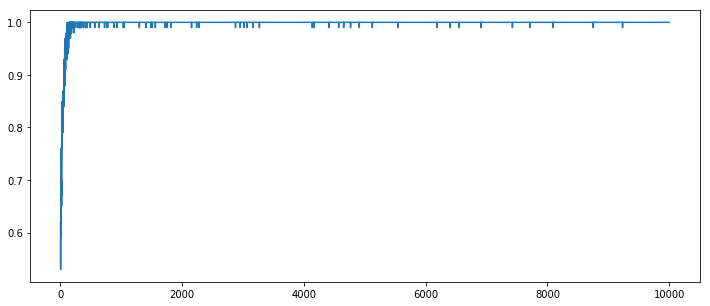

In [42]:
#計算開始
import numpy as np 
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
gauss_sampling.initialize(n_arms)
result = test_algorithm(gauss_sampling, n_arms, sim_num, time)

df_result = pd.DataFrame({'times':result[0], "chosen_arms":result[1],
                         "rewards_history":result[2],
                         'regret_history':result[3]})
df_result["best_arms"] = (df_result["chosen_arms"] == 
                          np.argmax(gauss_mean)).astype(int)
grouped = df_result['best_arms'].groupby(df_result['times'])
ax.plot(grouped.mean(), label=gauss_sampling.__class__.__name__)
plt.legend()
plt.show()

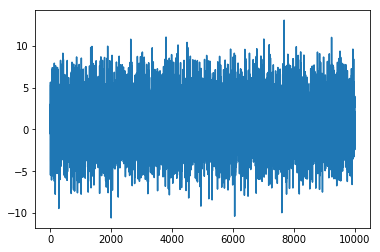

In [43]:
plt.plot(df_result['rewards_history'][0:10000])

In [44]:
df_sim1_rewads = df_result['rewards_history'][0:10000]


In [45]:
df_sum = np.cumsum(df_sim1_rewads)


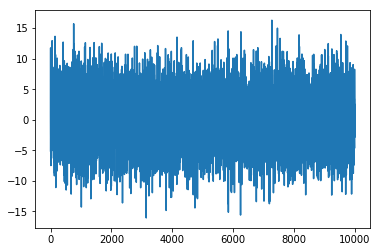

In [46]:
plt.plot(df_result['regret_history'][0:10000])

In [47]:
df_regret_sum = np.cumsum(df_result['regret_history'][0:10000])

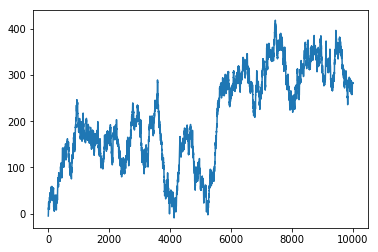

In [50]:
plt.plot(df_regret_sum)

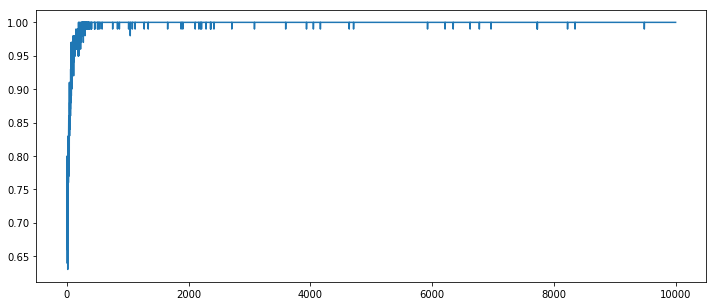

In [52]:
random.seed(2017)
sim_num = 100 
time = 10000
alpha = 0
gauss_sampling = GaussSampling([], [], [], alpha) 
import numpy as np 
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
gauss_sampling.initialize(n_arms)
result = test_algorithm(gauss_sampling, n_arms, sim_num, time)

df_result = pd.DataFrame({'times':result[0], "chosen_arms":result[1],
                         "rewards_history":result[2],
                         'regret_history':result[3]})
df_result["best_arms"] = (df_result["chosen_arms"] == 
                          np.argmax(gauss_mean)).astype(int)
grouped = df_result['best_arms'].groupby(df_result['times'])
ax.plot(grouped.mean(), label=gauss_sampling.__class__.__name__)
plt.show()

In [53]:
regret_grouped = df_result['regret_history'].groupby(df_result['times'])

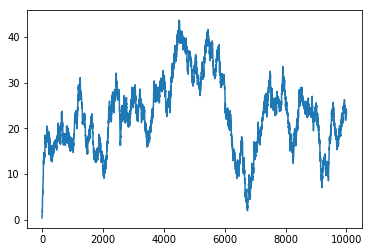

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_regret = np.cumsum(regret_grouped.mean())
ax.plot(df_regret, label=gauss_sampling.__class__.__name__)